In [1]:
import spacy
nlp = spacy.load("it_core_news_sm")

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


/home/v.acampora/venv2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-01-07 22:32:12.869992: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-07 22:32:13.443611: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
###################### carica dataset LDO 20-21 ############################ 

dataLDO2020 = pd.read_excel('/home/a.renda/to_move/LDO/filtrato_per_keyword/20-21_LDO_26K/LDO_20200101_20210101 pulito.ods', engine='odf')
dataLDO2021=pd.read_excel('/home/a.renda/to_move/LDO/filtrato_per_keyword/20-21_LDO_26K/LDO_20210101_20220101 pulito.ods', engine='odf')


In [3]:
# Filtra le righe che non contengono numeri (escludendo anche i NaN)
dataLDO2021 = dataLDO2021[dataLDO2021['nosologico'].astype(str).str.contains(r'\d')]
#rimosse 212 righe

In [ ]:
print("\nColumns LDO 20-21:", dataLDO2020.columns)
print("\nColumns LDO 21-22:", dataLDO2021.columns)
print("\nShape LDO 20-21:", dataLDO2020.shape)
print("\nShape LDO 21-22:", dataLDO2021.shape)



Columns LDO 20-21: Index(['nosologico', 'time_inserimento', 'dataInizio', 'dataFine', 'testo',
       'motivo_ricovero', 'anamnesi', 'esameobiettivo', 'terapiafarmaingresso',
       'decorso', 'laboratorio', 'interventi', 'followup', 'terapie2',
       'terapie3', 'esami', 'reparto'],
      dtype='object')

Columns LDO 21-22: Index(['nosologico', 'time_inserimento', 'dataInizio', 'dataFine', 'testo',
       'motivo_ricovero', 'anamnesi', 'esameobiettivo', 'terapiafarmaingresso',
       'decorso', 'laboratorio', 'interventi', 'followup', 'terapie2',
       'terapie3', 'esami', 'reparto'],
      dtype='object')

Shape LDO 20-21: (24123, 17)

Shape LDO 21-22: (39274, 17)


In [4]:
######################## carica database filtrato ###############################

databaseFiltrato=pd.read_csv('/home/a.renda/to_move/LDO/labeled/20-21_341/DatabaseFiltrato.csv', sep=';')
print(databaseFiltrato.shape)
print(databaseFiltrato.columns) # la prima colonna è solo un contatore

(26237, 3)
Index(['Unnamed: 0', 'nosologico', 'label'], dtype='object')


In [5]:
# Filtra le righe che non contengono numeri (escludendo anche i NaN)
databaseFiltrato = databaseFiltrato[databaseFiltrato['nosologico'].astype(str).str.contains(r'\d')]

#tolte 5 righe

In [6]:
#################### filtra ldo 2020 ##########################

# Converti la colonna 'nosologico' del secondo dataset in int
databaseFiltrato['nosologico'] = pd.to_numeric(databaseFiltrato['nosologico'], errors='coerce')


# Trova i nosologici comuni
comuni2020 = dataLDO2020['nosologico'].isin(databaseFiltrato['nosologico'])

# Filtra il primo dataset
dataset_filtrato2020 = dataLDO2020[comuni2020]
print(dataset_filtrato2020.columns)
print(dataset_filtrato2020.shape)

Index(['nosologico', 'time_inserimento', 'dataInizio', 'dataFine', 'testo',
       'motivo_ricovero', 'anamnesi', 'esameobiettivo', 'terapiafarmaingresso',
       'decorso', 'laboratorio', 'interventi', 'followup', 'terapie2',
       'terapie3', 'esami', 'reparto'],
      dtype='object')
(8974, 17)


In [7]:
####################### filtra ldo 2021 ###########################

# Trova i nosologici comuni
comuni2021 = dataLDO2021['nosologico'].isin(databaseFiltrato['nosologico'])

# Filtra il primo dataset
dataset_filtrato2021 = dataLDO2021[comuni2021]
print(dataset_filtrato2021.columns)
print(dataset_filtrato2021.shape)

Index(['nosologico', 'time_inserimento', 'dataInizio', 'dataFine', 'testo',
       'motivo_ricovero', 'anamnesi', 'esameobiettivo', 'terapiafarmaingresso',
       'decorso', 'laboratorio', 'interventi', 'followup', 'terapie2',
       'terapie3', 'esami', 'reparto'],
      dtype='object')
(17218, 17)


In [8]:
######################## merge ldo2020 e ldo 2021 filtrati ###################################

merged_dataset = pd.concat([dataset_filtrato2020, dataset_filtrato2021], ignore_index=True) # non ci sono duplicati tra i due dataset 

# Risultato finale
print("\nColumns merged dataset:",merged_dataset.columns)
print("\nShape merged dataset:",merged_dataset.shape)
print(merged_dataset['testo'][0])



Columns merged dataset: Index(['nosologico', 'time_inserimento', 'dataInizio', 'dataFine', 'testo',
       'motivo_ricovero', 'anamnesi', 'esameobiettivo', 'terapiafarmaingresso',
       'decorso', 'laboratorio', 'interventi', 'followup', 'terapie2',
       'terapie3', 'esami', 'reparto'],
      dtype='object')

Shape merged dataset: (26192, 17)
ObesitÃ  di classe III complicata da ipertensione arteriosa, insulino-resistenza con ridotta tolleranza glucidica, epatomegalia steatosica, insufficienza venosa arti inferiori, ipovitaminosi D e ernia iatale,colelitiasi trattata con colecistectomia,regredita a obesitÃ  di classe I dopo intervento chirurgico di bypass gastrico (2011) al peso di 142 Kg con persistenza di ipovitaminosi D, remissione delle comorbiditÃ  e comparsa di ipoglicemia reattiva sintomatica. Micronodulia tiroidea. Anemia microcitica ipocrocromica, sideropenica. Emorroidi congeste del canale anale.Terapia consigliata alla dimissione:Pr: Bariatrifast cpS: 1 cp ore 8.00Pr: Gl

In [9]:
######################## carica dataset con nosologici positivi #####################

Positivi= pd.read_excel('/home/a.renda/to_move/LDO/labeled/20-21_341/NosologiciPositivi_341.xlsx')

In [10]:
################################### aggiungere la colonna positivi #########################################

# Convertire la colonna 'Nosologico' in numerico nel dataset NosologiciPositivi
nosologici_positivi = pd.to_numeric(Positivi['NosologiciPositivi'], errors='coerce').dropna()

# Creare la colonna 'positivi' nel DataFrame merged_dataset
merged_dataset['positivi'] = merged_dataset['nosologico'].isin(nosologici_positivi).astype(int)


# Contare quanti 1 e quanti 0 ci sono nella colonna 'positivi'
count_positivi = merged_dataset['positivi'].value_counts()

# Stampa i risultati
print("\nConteggio dei valori nella colonna 'positivi':")
print(f"Numero di 1 (positivi): {count_positivi.get(1, 0)}")
print(f"Numero di 0 (non positivi): {count_positivi.get(0, 0)}")


Conteggio dei valori nella colonna 'positivi':
Numero di 1 (positivi): 341
Numero di 0 (non positivi): 25851


In [12]:
# Unire parole e numeri in 'reparto' rimuovendo lo spazio e sostituendo con un trattino
merged_dataset['reparto'] = merged_dataset['reparto'].str.replace(r'(\w) (\d)', r'\1-\2', regex=True)

# Visualizza i risultati
print(merged_dataset['reparto'].head())

0    UO Endocrinologia-1
1    UO Endocrinologia-1
2    UO Endocrinologia-1
3    UO Endocrinologia-1
4    UO Endocrinologia-1
Name: reparto, dtype: object


In [11]:
###################### pulisci il testo: risoluzione di errori di codifica, sostituzione caratteri speciali #######################
import ftfy

# Applica ftfy.fix_text() a tutte le colonne di testo nel dataset, gestendo i valori non testuali
for col in merged_dataset.select_dtypes(include='object').columns:
    merged_dataset[col] = merged_dataset[col].apply(lambda x: ftfy.fix_text(x) if isinstance(x, str) else x)


In [13]:
########################## PRE-PROCESSING ##########################

import spacy
import pandas as pd
import re

# Carica il modello SpaCy per l'italiano
nlp = spacy.load("it_core_news_lg", disable=["parser", "ner"])

# Lista delle colonne su cui applicare il preprocessing
colonne_da_preprocessare = ['testo', 'motivo_ricovero', 'anamnesi', 
                             'esameobiettivo', 'terapiafarmaingresso', 
                             'decorso', 'laboratorio', 'interventi', 
                             'followup', 'terapie2', 'terapie3', 
                             'esami', 'reparto']  # Sostituisci con i nomi reali delle colonne

# Funzione per pulire i token (inclusi numeri, punti e virgole)
def clean_token(token):
    
    # Sostituisce tutti i caratteri non alfanumerici (inclusi simboli, punteggiatura, numeri, ecc.) con uno spazio.
    cleaned_token = re.sub(r'[^a-zA-ZàèéìòùÀÈÉÌÒÙ]', ' ', token)
    cleaned_token = re.sub(r'\s+', ' ', cleaned_token).strip()  # Normalizza gli spazi multipli
    
    return cleaned_token

# Funzione per tokenizzare e preprocessare il testo
def preprocess_text(row):
    if not isinstance(row, str):  # Verifica che il dato sia una stringa valida
        return ""  # Restituisce una stringa vuota se non valido
    
    # Rimuove date nel formato 'dd/mm/yyyy' e 'dd/mm/yy'
    row = re.sub(r'\d{1,2}/\d{1,2}/\d{2,4}', '', row)
    row = re.sub(r'\d{1,2}/\d{1,2}', '', row)  # Rimuove numeri separati da /
       
    # Aggiunge spazi tra numeri e lettere (es. "800duloxetina" -> "800 duloxetina")
    row = re.sub(r'(\d+)([a-zA-Z]+)', r'\1 \2', row)
    row = re.sub(r'([a-zA-Z]+)(\d+)', r'\1 \2', row)

    # Aggiunge spazi tra parole composte tipo "vediAllegato" -> "vedi Allegato"
    row = re.sub(r'([a-zàèéìòù])([A-ZÀÈÉÌÒÙ])', r'\1 \2', row)

    # normalizza  spazi (se ci sono più spazi consecutivi, vengono ridotti a uno solo) e rimuove  spazi all'inizio e alla fine della stringa
    row = re.sub(r'[^\w\s]', ' ', row)  # Rimuove caratteri non alfanumerici e parentesi

    # Tokenizza il testo con SpaCy
    doc = nlp(row)
    
    # Filtra stopwords, punteggiatura e token senza embedding
    tokens_puliti = [
        clean_token(token.lemma_.lower())  # lemmatizzazione e pulisce il token
        for token in doc
        if not token.is_punct and not token.is_stop and len(token.text) > 1 #and token.text.isalpha() #per rimuovere token formati da una singola lettera
    ]
    
    # Applica un filtro finale per rimuovere manualmente le lettere singole
    tokens_puliti = [token for token in tokens_puliti if len(token) > 1]  # Assicura che tutte le parole siano > 1 carattere
    
    # Ricombina i token in una stringa
    return " ".join(tokens_puliti)

# Applica il preprocessing per ciascuna colonna specificata
for colonna in colonne_da_preprocessare:
    nuova_colonna = f"{colonna}_preprocessed"  # Nome della nuova colonna
    merged_dataset[nuova_colonna] = merged_dataset[colonna].apply(preprocess_text)

# Visualizza i risultati per le nuove colonne preprocessate
print(merged_dataset[[colonna for colonna in colonne_da_preprocessare] + 
                     [f"{col}_preprocessed" for col in colonne_da_preprocessare]])


                                                   testo  \
0      Obesità di classe III complicata da ipertensio...   
1      Carcinoma della tiroide a cellule ossifile (4 ...   
2      Carcinoma papillare differenziato della tiroid...   
3      gozzo multinodulare con quattro focolai di car...   
4      Carcinoma papillare (1,5 cm) variante classica...   
...                                                  ...   
26187  Cistopessi fasciale in paziente con cistocele ...   
26188  Polipectomia resettoscopica, miomectomia reset...   
26189  Laparoscopia, isterectomia sovracervicale, ann...   
26190  Polipectomia resettoscopica in paziente con po...   
26191                                  Mioma sottomucoso   

                                         motivo_ricovero  \
0      Accertamenti in paziente con sangue occulto po...   
1      trattamento radiometabolico con 131-I a dose alta   
2      Terapia radiometabolica con 131-I a scopo adiu...   
3      terapia radiometabolica con 131-

In [15]:
############################ DIMENSIONE VOCABOLARIO ############################
# Calcola il vocabolario
vocab_set = set()
# Itera sulle prime 100 righe delle colonne preprocessate
for colonna in colonne_da_preprocessare:
    for testo in merged_dataset[f"{colonna}_preprocessed"]:  # Limita a 100 righe
        if isinstance(testo, str):  # Assicurati che il testo non sia NaN
            vocab_set.update(testo.split())

# Calcola la dimensione del vocabolario
vocabolario_dimensione = len(vocab_set)
print("Dimensione del vocabolario:", vocabolario_dimensione)

Dimensione del vocabolario: 129725


In [18]:
########################### MEDIA NUMERO PAROLE COLONNE PRE-PROCESSATE #######################

# Funzione per calcolare il numero di parole
def count_words(text):
    if isinstance(text, str):  # Verifica se il testo è una stringa
        return len(text.split())  # Conta le parole
    elif isinstance(text, (int, float)):  # Se è un numero
        return 1  # Considera il numero come una parola
    return 0  # Restituisce 0 se non è una stringa o un numero

for colonna in colonne_da_preprocessare:
    nuova_colonna = f"{colonna}_preprocessed"
    word_counts = merged_dataset[nuova_colonna].apply(count_words)  # Conta le parole in ogni stringa
    average_word_count = word_counts.mean()  # Calcola la lunghezza media
    print(f"Lunghezza media della colonna '{nuova_colonna}' in parole: {average_word_count:.2f}")


Lunghezza media della colonna 'testo_preprocessed' in parole: 19.96
Lunghezza media della colonna 'motivo_ricovero_preprocessed' in parole: 8.87
Lunghezza media della colonna 'anamnesi_preprocessed' in parole: 177.85
Lunghezza media della colonna 'esameobiettivo_preprocessed' in parole: 35.06
Lunghezza media della colonna 'terapiafarmaingresso_preprocessed' in parole: 10.23
Lunghezza media della colonna 'decorso_preprocessed' in parole: 139.84
Lunghezza media della colonna 'laboratorio_preprocessed' in parole: 123.56
Lunghezza media della colonna 'interventi_preprocessed' in parole: 42.61
Lunghezza media della colonna 'followup_preprocessed' in parole: 71.41
Lunghezza media della colonna 'terapie2_preprocessed' in parole: 2.22
Lunghezza media della colonna 'terapie3_preprocessed' in parole: 34.50
Lunghezza media della colonna 'esami_preprocessed' in parole: 14.21
Lunghezza media della colonna 'reparto_preprocessed' in parole: 2.99


In [ ]:
############################################

In [22]:
########################## CLASSIFIERS #################

import numpy as np
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Definisci una lista di classificatori che vuoi provare
classifiers = {
    #'RandomForest': RandomForestClassifier(n_jobs=-1, max_depth=10, max_features=0.1, random_state=42),
    #'LogisticRegression': LogisticRegression(random_state=42, max_iter=3000),
    #'SVM': SVC(probability=True,random_state=42),
    #'KNeighbors': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(max_depth=10, random_state=42),
    #'extremeGradientBoosting': XGBClassifier(learning_rate=0.1, random_state=42, n_jobs=-1, max_depth=6),
    #'DecisionTree': DecisionTreeClassifier(max_depth=20, random_state=42),
    #'GradientBoosting': GradientBoostingClassifier(learning_rate=0.1, min_samples_split=10, random_state=42),
}

In [27]:
######################## CROSS VALIDATION ########################

from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import numpy as np
import pandas as pd

def eval_cross_validation(pipeline, X, y, skf):
    list_reports = []
    list_auc = []  # Lista per raccogliere i valori di AUC
    list_num_features = []  # Lista per raccogliere il numero di features per ogni fold

    # Metriche aggregate per ogni classe
    precision_sum = {}
    recall_sum = {}
    f1_sum = {}
    support_sum = {}  # Per il calcolo del supporto medio

    # Liste per calcolare deviazioni standard
    precision_values = {}
    recall_values = {}
    f1_values = {}

    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # Addestra il pipeline
        pipeline.fit(X_train, y_train)

        # Previsioni e probabilità
        y_pred = pipeline.predict(X_val)
        y_pred_prob = pipeline.predict_proba(X_val)[:, 1]  # Probabilità della classe positiva

        # Classification report per il fold
        report = classification_report(y_val, y_pred, output_dict=True)
        list_reports.append(report)

        # AUC per il fold
        auc = roc_auc_score(y_val, y_pred_prob)
        list_auc.append(auc)

        # Numero di features (fisso per embedding precalcolati)
        num_features = X.shape[1]
        list_num_features.append(num_features)

        # Somma le metriche per ogni classe
        for label, metrics in report.items():
            if label not in ["accuracy", "macro avg", "weighted avg"]:
                precision_sum[label] = precision_sum.get(label, 0) + metrics["precision"]
                recall_sum[label] = recall_sum.get(label, 0) + metrics["recall"]
                f1_sum[label] = f1_sum.get(label, 0) + metrics["f1-score"]
                support_sum[label] = support_sum.get(label, 0) + metrics["support"]

                # Aggiungi i valori per la deviazione standard
                precision_values[label] = precision_values.get(label, []) + [metrics["precision"]]
                recall_values[label] = recall_values.get(label, []) + [metrics["recall"]]
                f1_values[label] = f1_values.get(label, []) + [metrics["f1-score"]]

    # Calcola le medie delle metriche
    num_folds = skf.get_n_splits()
    precision_avg = {label: precision_sum[label] / num_folds for label in precision_sum}
    recall_avg = {label: recall_sum[label] / num_folds for label in recall_sum}
    f1_avg_per_class = {label: f1_sum[label] / num_folds for label in f1_sum}
    support_avg = {label: support_sum[label] / num_folds for label in support_sum}

    # Calcola le deviazioni standard
    precision_std = {label: np.std(precision_values[label]) for label in precision_values}
    recall_std = {label: np.std(recall_values[label]) for label in recall_values}
    f1_std = {label: np.std(f1_values[label]) for label in f1_values}

    # Media di AUC e numero di features
    auc_avg = np.mean(list_auc)
    num_features_avg = np.mean(list_num_features)

    # Crea un DataFrame riassuntivo
    df_avg = pd.DataFrame({
        "Precision": precision_avg,
        "Recall": recall_avg,
        "F1-Score": f1_avg_per_class,
        "Support Avg": support_avg,  # Supporto medio
        "Precision Std": precision_std,
        "Recall Std": recall_std,
        "F1-Score Std": f1_std,
    })

    return df_avg, auc_avg, f1_avg_per_class, num_features_avg


# Configura StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


In [16]:
!python -m spacy download it_core_news_lg

DEPRECATION: https://github.com/explosion/spacy-models/releases/download/it_core_news_lg-3.2.0/it_core_news_lg-3.2.0-py3-none-any.whl#egg=it_core_news_lg==3.2.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 576.2/576.2 MB 42.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_lg')


In [28]:
########################### WORD2VEC con embedding precalcolati spacy (senza vettore di zeri + counter oov) #################

from collections import Counter
import spacy
import numpy as np
import matplotlib.pyplot as plt

def compute_embeddings_parallel(texts, nosologici, nlp, batch_size=1000, n_process=-1, max_oov_display=50):
    print("Calcolo degli embedding in corso...")

    # Inizializza contatori e insiemi
    oov_words_counter = Counter()  # Contatore per parole OOV
    valid_words_unique = set()  # Parole valide uniche
    oov_per_doc = []  # Numero di parole OOV per documento
    oov_details = []  # Dettagli OOV per documento (numero di OOV e testo originale, nosologico)

    # Elaborazione dei testi in batch
    docs = nlp.pipe(texts, batch_size=batch_size, n_process=n_process)
    embeddings = []

    for idx, doc in enumerate(docs):
        doc_embedding = []
        doc_oov = set()  # Parole OOV uniche per questo documento

        for token in doc:
            if not token.has_vector or np.all(token.vector == 0):
                if token.text.strip():
                    oov_words_counter[token.text] += 1
                    doc_oov.add(token.text)
            else:
                valid_words_unique.add(token.text)
                doc_embedding.append(token.vector)

        # Calcola embedding medio del documento
        if doc_embedding:
            embeddings.append(np.mean(doc_embedding, axis=0))
        else:
            embeddings.append(np.zeros(nlp.vocab.vectors_length))  # Fallback: vettore zero

        oov_per_doc.append(len(doc_oov))
        oov_details.append((len(doc_oov), texts[idx], nosologici[idx]))

    # Calcolo statistiche
    total_unique_words = len(valid_words_unique.union(oov_words_counter.keys()))
    oov_percentage_unique = (len(oov_words_counter.keys()) / total_unique_words) * 100

    print(f"Totale parole valide uniche: {len(valid_words_unique)}")
    print(f"Totale parole OOV uniche: {len(oov_words_counter.keys())}")
    print(f"Totale parole uniche nel dataset (OOV + valide): {total_unique_words}")
    print(f"Percentuale di parole OOV rispetto al totale di parole uniche: {oov_percentage_unique:.2f}%")

    # Mostra prime parole OOV
    print("\nPrime 50 parole OOV uniche ordinate per frequenza:")
    for i, (word, count) in enumerate(oov_words_counter.most_common(max_oov_display)):
        print(f"{i+1}. {word}: {count}")

    print("Calcolo degli embedding completato.")

    return np.array(embeddings), oov_words_counter, valid_words_unique


Elaborazione della colonna 'testo_preprocessed' (1/13)...
Calcolo degli embedding in corso...


Totale parole valide uniche: 8493
Totale parole OOV uniche: 8077
Totale parole uniche nel dataset (OOV + valide): 16570
Percentuale di parole OOV rispetto al totale di parole uniche: 48.74%

Prime 50 parole OOV uniche ordinate per frequenza:
1. etp: 2158
2. sars: 887
3. normocitica: 846
4. ipb: 802
5. pta: 586
6. ateromasia: 437
7. normocromica: 433
8. emicolectomia: 412
9. ndd: 410
10. annessiectomia: 405
11. hcc: 401
12. polidistrettuale: 332
13. tvp: 328
14. ivu: 306
15. ptca: 297
16. covid: 291
17. litiasica: 288
18. primigravida: 288
19. dismetabolica: 282
20. dilatativo: 271
21. esotossica: 262
22. bioprotesi: 261
23. ptg: 260
24. nstemi: 244
25. cvc: 242
26. subocclusione: 238
27. secondarismi: 231
28. ndm: 230
29. ernioplastica: 228
30. colangiografia: 221
31. aoai: 211
32. bpac: 192
33. bav: 191
34. isteroannessiectomia: 188
35. microlitiasi: 188
36. coprostasi: 186
37. tachifrequente: 183
38. mrge: 178
39. resettoscopica: 177
40. doac: 175
41. ercp: 169
42. osas: 163
43. eter

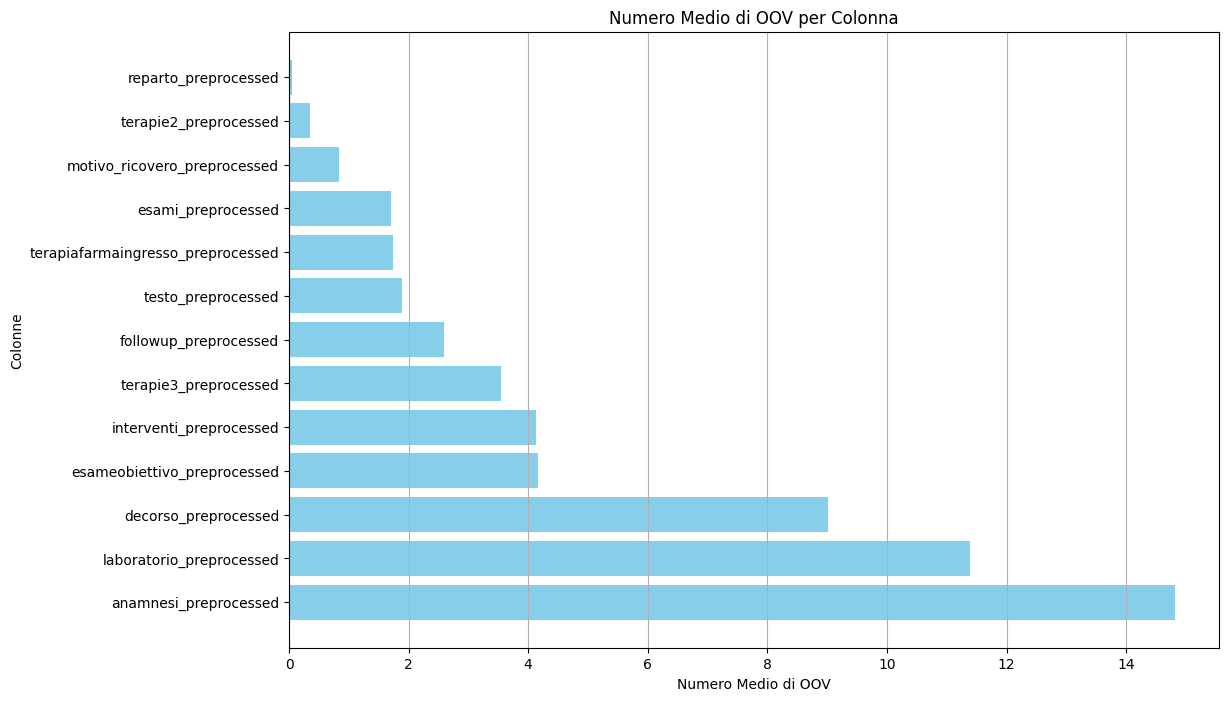


### Dimensione degli embedding combinati ###
Shape (n_righe, n_colonne): (26192, 3900)
n_righe: 26192 (dovrebbe essere uguale al numero di righe del dataset: 26192)
n_colonne: 3900 (dovrebbe essere 300 x 13 = 3900)
Calcolo degli embedding combinati completato.


In [29]:
############################### EMBEDDING MULTI COLONNA ##################################

def compute_embeddings_multiple_columns(column_names, nosologici, nlp, batch_size=1000, n_process=-1):
    combined_embeddings = None
    global_oov_counter = Counter()
    global_valid_words = set()
    column_oov_counts = {}  # Per salvare il conteggio OOV per ogni colonna


    for col_idx, column_name in enumerate(column_names):
        print(f"Elaborazione della colonna '{column_name}' ({col_idx + 1}/{len(column_names)})...")

        # Estrai testi dalla colonna
        texts = merged_dataset[column_name].fillna("").tolist()

        # Calcola embedding per la colonna
        embeddings, oov_words_counter, valid_words_unique = compute_embeddings_parallel(
            texts, nosologici, nlp, batch_size, n_process
        )

        # Calcola il numero di OOV per ogni documento in questa colonna
        oov_per_doc = []
        for text in texts:
            oov_count = len([word for word in text.split() if word in oov_words_counter])
            oov_per_doc.append(oov_count)

        # Calcola la media degli OOV per la colonna
        column_oov_counts[column_name] = oov_per_doc

        # Converti in array numpy e verifica la forma
        embeddings = np.array(embeddings)
        if embeddings.ndim == 1:
            embeddings = embeddings.reshape(-1, 1)

        # Combina gli embedding
        if combined_embeddings is None:
            combined_embeddings = embeddings
        else:
            combined_embeddings = np.hstack((combined_embeddings, embeddings))

        # Aggiorna statistiche globali
        global_oov_counter.update(oov_words_counter)
        global_valid_words.update(valid_words_unique)

    # Statistiche globali
    total_unique_words = len(global_valid_words.union(global_oov_counter.keys()))
    oov_percentage_unique = (len(global_oov_counter.keys()) / total_unique_words) * 100

    print("\n### Statistiche globali sugli embedding combinati ###")
    print(f"Totale parole valide uniche (tutte le colonne): {len(global_valid_words)}")
    print(f"Totale parole OOV uniche (tutte le colonne): {len(global_oov_counter.keys())}")
    print(f"Totale parole uniche nel dataset (valide + OOV): {total_unique_words}")
    print(f"Percentuale di parole OOV rispetto al totale di parole uniche: {oov_percentage_unique:.2f}%")

    # Stampa le prime 50 OOV globali
    print("\nPrime 50 parole OOV uniche ordinate per frequenza (globali):")
    for i, (word, count) in enumerate(global_oov_counter.most_common(50)):
        print(f"{i+1}. {word}: {count}")

    # Calcolare la media degli OOV per ogni colonna
    column_oov_averages = {col: np.mean(oov_counts) for col, oov_counts in column_oov_counts.items()}

    # Ordinare le colonne in base al numero medio di OOV
    sorted_columns = sorted(column_oov_averages.items(), key=lambda x: x[1], reverse=True)

    # Stampa le colonne ordinate in base alla media degli OOV
    print("\nOrdine delle colonne in base al numero medio di OOV (decrescente):")
    for i, (column_name, avg_oov) in enumerate(sorted_columns):
        print(f"{i + 1}. Colonna: '{column_name}' | OOV medio: {avg_oov:.2f}")

    # Crea il grafico a barre con il numero medio di OOV per colonna
    column_names_sorted = [x[0] for x in sorted_columns]
    avg_oov_values = [x[1] for x in sorted_columns]

    plt.figure(figsize=(12, 8))
    plt.barh(column_names_sorted, avg_oov_values, color='skyblue')
    plt.xlabel('Numero Medio di OOV')
    plt.ylabel('Colonne')
    plt.title('Numero Medio di OOV per Colonna')
    plt.grid(True, axis='x')
    plt.show()

    # Verifica della dimensione finale degli embedding combinati
    combined_embeddings = np.array(combined_embeddings)
    print(f"\n### Dimensione degli embedding combinati ###")
    print(f"Shape (n_righe, n_colonne): {combined_embeddings.shape}")
    print(f"n_righe: {combined_embeddings.shape[0]} (dovrebbe essere uguale al numero di righe del dataset: {len(merged_dataset)})")
    print(f"n_colonne: {combined_embeddings.shape[1]} (dovrebbe essere 300 x {len(column_names)} = {300 * len(column_names)})")

    print("Calcolo degli embedding combinati completato.")

    return combined_embeddings


# Elenco delle colonne di testo
text_columns = [
    'testo_preprocessed', 'motivo_ricovero_preprocessed', 'anamnesi_preprocessed', 
               'esameobiettivo_preprocessed', 'terapiafarmaingresso_preprocessed', 
               'decorso_preprocessed', 'laboratorio_preprocessed', 'interventi_preprocessed', 
               'followup_preprocessed', 'terapie2_preprocessed', 'terapie3_preprocessed', 
               'esami_preprocessed', 'reparto_preprocessed'
]

y = merged_dataset['positivi']
nosologici = merged_dataset['nosologico'].tolist()  # Lista degli identificativi (colonna 'nosologico')

# Calcolo degli embedding combinati
X_embeddings_combined = compute_embeddings_multiple_columns(text_columns, nosologici, nlp)

# Salva gli embedding combinati
np.save('X_embeddings_combined.npy', X_embeddings_combined)

# Per ricaricare in futuro
# X_embeddings_combined = np.load('X_embeddings_combined.npy')


In [ ]:
#########################################################


### Modello: extremeGradientBoosting ###


Classification report mediato:
   Precision    Recall  F1-Score  Support Avg  Precision Std  Recall Std  \
0   0.987841  0.999381  0.993577       2585.1       0.000528    0.000495   
1   0.543333  0.067479  0.118579         34.1       0.344819    0.039610   

   F1-Score Std  
0      0.000335  
1      0.069000  
AUC medio: 0.9262
Numero medio di features: 3900.00


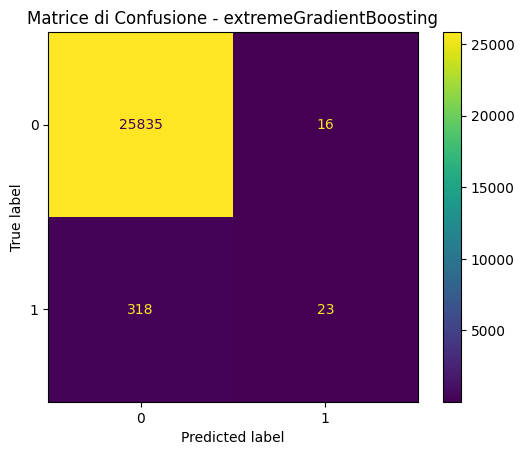

In [19]:
#################################### NO SMOTE ###################################

import spacy
import numpy as np
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline



# Esegui la cross-validation per ogni classificatore
for clf_name, clf in classifiers.items():
    print(f"\n### Modello: {clf_name} ###")

    # Crea la pipeline per il classificatore corrente
    pipeline = Pipeline([('classificazione', clf)])

    # Usa gli embedding precalcolati
    X = X_embeddings_combined

    # Fit della pipeline
    pipeline.fit(X, y)

    # Calcola le metriche usando la funzione (modifica per adattare alla tua funzione eval_cross_validation)
    df_avg, auc_avg, f1_avg_per_class, num_features_avg = eval_cross_validation(pipeline, X, y, skf)

    # Stampa i risultati
    print("Classification report mediato:")
    print(df_avg)
    print(f"AUC medio: {auc_avg:.4f}")
    print(f"Numero medio di features: {num_features_avg:.2f}")

    # Previsioni su tutto il dataset usando cross_val_predict
    y_pred = cross_val_predict(pipeline, X, y, cv=skf)

    # Visualizza la matrice di confusione
    ConfusionMatrixDisplay.from_predictions(y, y_pred)
    plt.title(f"Matrice di Confusione - {clf_name}")
    plt.show()



### Modello: extremeGradientBoosting ###
Classification report mediato:
   Precision    Recall  F1-Score  Support Avg  Precision Std  Recall Std  \
0   0.991003  0.992612  0.991806       2585.1       0.000952    0.001323   
1   0.361077  0.316639  0.335267         34.1       0.063955    0.073754   

   F1-Score Std  
0      0.000742  
1      0.064918  
AUC medio: 0.9269
Numero medio di features: 3900.00


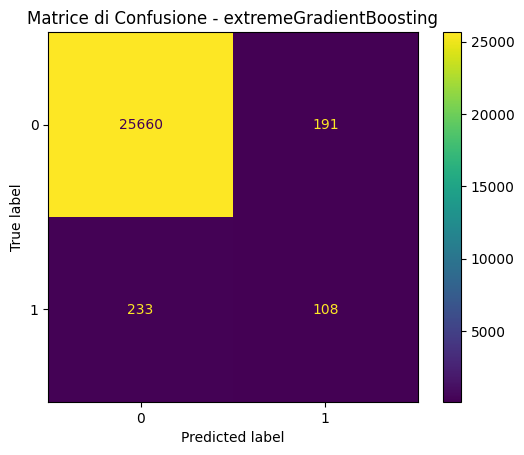

In [20]:
##################### SMOTE #######################################

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Esegui la cross-validation per ogni classificatore
for clf_name, clf in classifiers.items():
    print(f"\n### Modello: {clf_name} ###")

    # Crea la pipeline per il classificatore corrente
    pipeline = Pipeline([('smote', SMOTE(random_state=42)),('classificazione', clf)])

    # Usa gli embedding precalcolati
    X = X_embeddings_combined

    # Fit della pipeline
    pipeline.fit(X, y)

    # Calcola le metriche usando la funzione (modifica per adattare alla tua funzione eval_cross_validation)
    df_avg, auc_avg, f1_avg_per_class, num_features_avg = eval_cross_validation(pipeline, X, y, skf)

    # Stampa i risultati
    print("Classification report mediato:")
    print(df_avg)
    print(f"AUC medio: {auc_avg:.4f}")
    print(f"Numero medio di features: {num_features_avg:.2f}")

    # Previsioni su tutto il dataset usando cross_val_predict
    y_pred = cross_val_predict(pipeline, X, y, cv=skf)

    # Visualizza la matrice di confusione
    ConfusionMatrixDisplay.from_predictions(y, y_pred)
    plt.title(f"Matrice di Confusione - {clf_name}")
    plt.show()



### Modello: DecisionTree ###
Classification report mediato:
   Precision    Recall  F1-Score  Support Avg  Precision Std  Recall Std  \
0   0.992281  0.905187  0.946714       2585.1       0.000715    0.008636   
1   0.061392  0.466471  0.108426         34.1       0.008049    0.046097   

   F1-Score Std  
0      0.004819  
1      0.013536  
AUC medio: 0.6685
Numero medio di features: 3900.00


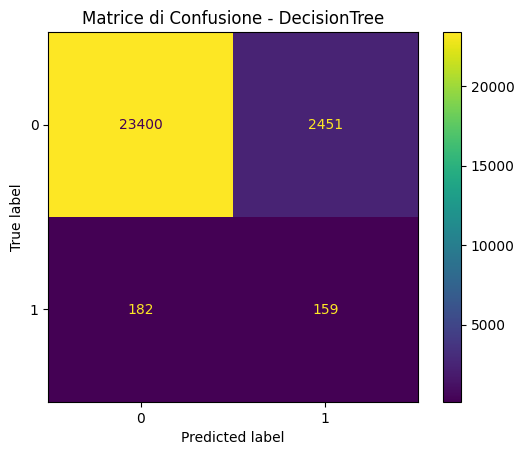

In [30]:
##################### SMOTE + UNDERSAMLING #######################################

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Esegui la cross-validation per ogni classificatore
for clf_name, clf in classifiers.items():
    print(f"\n### Modello: {clf_name} ###")

    # Crea la pipeline per il classificatore corrente
    pipeline = Pipeline([
    ('smote', SMOTE(random_state=42, sampling_strategy=0.6)),  # Applica SMOTE fino al 60% della classe maggioritaria
    ('undersample', RandomUnderSampler(sampling_strategy=1.0, random_state=42)),
    ('classificazione', clf)])

    # Usa gli embedding precalcolati
    X = X_embeddings_combined

    # Fit della pipeline
    pipeline.fit(X, y)

    # Calcola le metriche usando la funzione (modifica per adattare alla tua funzione eval_cross_validation)
    df_avg, auc_avg, f1_avg_per_class, num_features_avg = eval_cross_validation(pipeline, X, y, skf)

    # Stampa i risultati
    print("Classification report mediato:")
    print(df_avg)
    print(f"AUC medio: {auc_avg:.4f}")
    print(f"Numero medio di features: {num_features_avg:.2f}")

    # Previsioni su tutto il dataset usando cross_val_predict
    y_pred = cross_val_predict(pipeline, X, y, cv=skf)

    # Visualizza la matrice di confusione
    ConfusionMatrixDisplay.from_predictions(y, y_pred)
    plt.title(f"Matrice di Confusione - {clf_name}")
    plt.show()
